In [2]:
!pip install matplotlib

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('data_ML2.csv')

In [6]:
df.head()

,Order_ID,User_ID,Dish_ID,Dish_Name,Ingredients_List,Dish_Rating,Order_Date,Quantity,Order_Price,Delivery_Location,User_Age,User_Gender,User_Preferences,Month,Season,Vendor_ID
0,1,121,1448,Haldi Ki Sabzi,"Turmeric Root, Yogurt, Spices",4.6,2024-01-29,3,180,Mira-Bhayandar,31,Male,Vegetarian,Jan,Winter,V6
1,2,145,1086,Poha,"Flattened Rice, Mustard Seeds, Curry Leaves, O...",4.0,2024-01-07,1,165,Panchkula,50,Male,Vegetarian,Jan,Summer,V6
2,3,138,1013,Mutton Keema,"Minced Mutton, Onion, Garlic, Spices",4.0,2024-05-07,4,61,Yamunanagar,28,Female,Non-Vegetarian,May,Summer,V6
3,4,150,1031,Rajma Chawal,"Kidney Beans, Rice, Onion, Garlic, Spices",4.2,2024-02-09,5,198,Sasaram,40,Female,Vegetarian,Feb,Monsoon,V3
4,5,117,1299,Mutton Keema,"Minced Mutton, Onion, Garlic, Spices",4.1,2024-05-19,5,123,Warangal,35,Female,Non-Vegetarian,May,Monsoon,V9


In [7]:
df.shape

(200, 16)

In [8]:
df.describe()

,Order_ID,User_ID,Dish_ID,Dish_Rating,Quantity,Order_Price,User_Age
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,124.160000,1236.280000,4.523500,3.060000,120.010000,35.130000
std,57.879185,14.577618,151.211661,0.297389,1.358539,45.235063,8.928701
min,1.000000,100.000000,1001.000000,4.000000,1.000000,51.000000,20.000000
25%,50.750000,111.000000,1102.250000,4.300000,2.000000,76.000000,28.000000
50%,100.500000,122.500000,1230.000000,4.500000,3.000000,117.500000,35.000000
75%,150.250000,137.000000,1373.000000,4.800000,4.000000,161.250000,42.000000
max,200.000000,150.000000,1500.000000,5.000000,5.000000,199.000000,50.000000


In [33]:
df['Dish_Name'].value_counts()

Dish_Name
Aloo Paratha        13
Haldi Ki Sabzi      12
Chicken Curry       12
Rava Upma           11
Egg Curry           11
Sarson Ka Saag      11
Sabudana Khichdi    10
Rajma Chawal        10
Thepla              10
Poha                 9
Kadhi                9
Chawal               8
Palak Paneer         7
Biryani              7
Masoor Dal           7
Dal Tadka            6
Mutton Keema         6
Roti                 6
Aloo Gobi            5
Korma                5
Dosa                 5
Pulao                5
Matar Paneer         5
Fish Fry             4
Idli                 3
Gajar Halwa          3
Name: count, dtype: int64

In [32]:
null_values=df.isnull().sum()

In [10]:
null_value_percentage = (null_values / len(df)) * 100                     #if the dataset contains null values
null_value_info = pd.DataFrame({
    'Null Values': null_values,
    'Percentage': null_value_percentage
})
print(null_value_info)

                   Null Values  Percentage
Order_ID                     0         0.0
User_ID                      0         0.0
Dish_ID                      0         0.0
Dish_Name                    0         0.0
Ingredients_List             0         0.0
Dish_Rating                  0         0.0
Order_Date                   0         0.0
Quantity                     0         0.0
Order_Price                  0         0.0
Delivery_Location            0         0.0
User_Age                     0         0.0
User_Gender                  0         0.0
User_Preferences             0         0.0
Month                        0         0.0
Season                       0         0.0
Vendor_ID                    0         0.0


In [11]:
df['Dish_Rating'].fillna(df['Dish_Rating'].mean(), inplace=True)  #handling null values by replacing the null values by the mean as rating is a numeric value

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode 'User_Preferences' and 'Season' as numerical values
label_encoder = LabelEncoder()
df['User_Preferences'] = label_encoder.fit_transform(df['User_Preferences'])
df['Season'] = label_encoder.fit_transform(df['Season'])

# OR Use one-hot encoding (if needed for certain algorithms)
df_encoded = pd.get_dummies(df, columns=['User_Preferences', 'Season'], drop_first=True)

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the numerical columns
df['Dish_Rating'] = scaler.fit_transform(df[['Dish_Rating']])


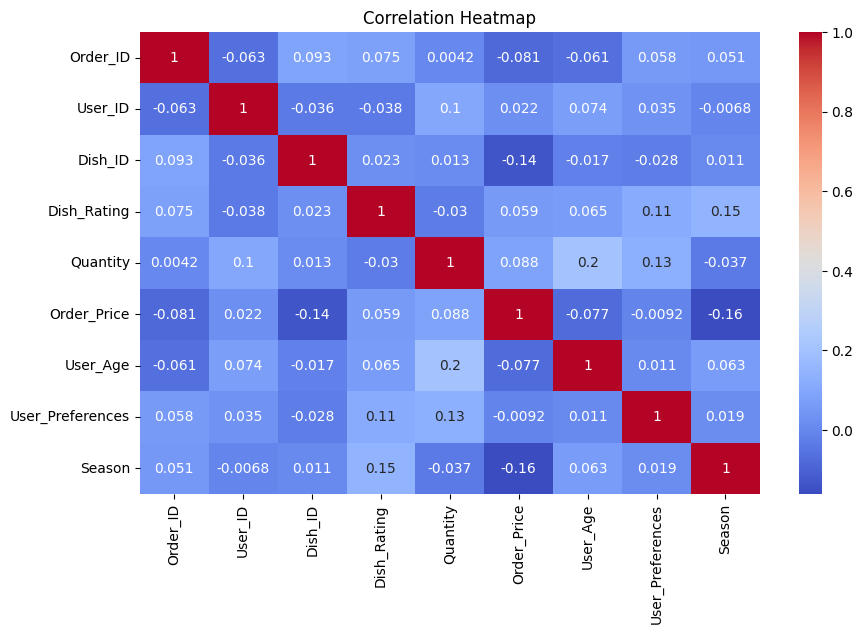

In [14]:
# Correlation heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Select only the numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Generate the correlation matrix
corr_matrix = numeric_df.corr()

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



In [15]:
from sklearn.model_selection import train_test_split

# Features and target variable
X = df.drop('Dish_Rating', axis=1)  # Dropping target column
y = df['Dish_Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(160, 15) (40, 15) (160,) (40,)


In [16]:
features = ['Order_Price', 'Dish_Rating', 'Quantity', 'User_Age']

df_encoded = pd.get_dummies(df[['Dish_Name', 'User_Gender', 'User_Preferences', 'Season','Month', 'Vendor_ID']], drop_first=True) # One-Hot Encoding for categorical features

X = pd.concat([df[features], df_encoded], axis=1)    # Combine encoded features with the numerical features

# Normalizing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


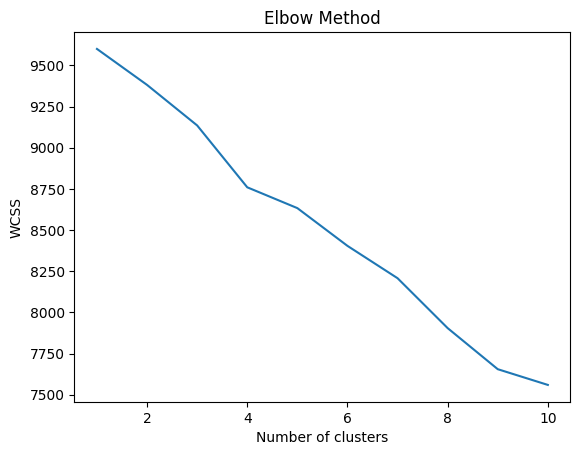

In [26]:
# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



In [27]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add the cluster labels to the original dataframe
df['Cluster'] = clusters

In [28]:
# Analyze clusters to identify dish patterns with seasonal trends
seasonal_cluster_analysis = df.groupby(['Cluster', 'Dish_Rating','User_Preferences','Quantity','Season'])['Dish_Name'].value_counts()
print(seasonal_cluster_analysis)

Cluster  Dish_Rating  User_Preferences  Quantity  Season  Dish_Name       
0        -1.764741    0                 5         0       Korma               1
                      1                 1         1       Poha                1
                                        2         0       Kadhi               1
         -1.427636    1                 5         0       Aloo Paratha        1
                                                  1       Rava Upma           1
         -1.090532    0                 5         2       Fish Fry            1
         -0.753428    1                 1         0       Dal Tadka           1
                                        2         0       Kadhi               1
                                                  1       Aloo Paratha        1
                                        3         0       Rava Upma           1
                                        5         0       Aloo Paratha        1
                                             

In [36]:
pd.set_option('display.max_rows', None)
preference_cluster_analysis = df.groupby(['Cluster', 'User_Preferences'])['Dish_Name'].value_counts()
print(preference_cluster_analysis)

Cluster  User_Preferences  Dish_Name       
0        0                 Korma                2
                           Mutton Keema         2
                           Biryani              1
                           Egg Curry            1
                           Fish Fry             1
         1                 Rava Upma            9
                           Kadhi                8
                           Palak Paneer         5
                           Aloo Paratha         4
                           Dal Tadka            4
                           Dosa                 3
                           Masoor Dal           3
                           Poha                 3
                           Rajma Chawal         3
                           Idli                 2
                           Matar Paneer         2
                           Chawal               1
                           Haldi Ki Sabzi       1
                           Pulao                1
      

In [35]:
pd.set_option('display.max_rows', None)
seasonal_cluster_analysis = df.groupby(['Cluster', 'Season'])['Dish_Name'].value_counts()
print(seasonal_cluster_analysis)

Cluster  Season  Dish_Name       
0        0       Kadhi               4
                 Aloo Paratha        2
                 Dal Tadka           2
                 Korma               2
                 Matar Paneer        2
                 Palak Paneer        2
                 Dosa                1
                 Idli                1
                 Masoor Dal          1
                 Mutton Keema        1
                 Poha                1
                 Pulao               1
                 Rava Upma           1
         1       Rava Upma           6
                 Rajma Chawal        2
                 Aloo Paratha        1
                 Dal Tadka           1
                 Egg Curry           1
                 Masoor Dal          1
                 Mutton Keema        1
                 Palak Paneer        1
                 Poha                1
                 Sarson Ka Saag      1
         2       Kadhi               4
                 Dosa         

#RECOMMENDATION USING SINGULAR VALUE DECOMPOSITION

In [55]:
import pandas as pd

In [56]:
df_svd=pd.read_csv('data_ML2.csv')

In [57]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

# Create a user-item matrix (User_ID x Dish_Name)
user_item_matrix = df_svd.pivot_table(index='User_ID', columns='Dish_Name', values='Order_Price').fillna(0)

In [58]:
# Apply SVD (Singular Value Decomposition)
svd = TruncatedSVD(n_components=26, random_state=42)
latent_matrix = svd.fit_transform(user_item_matrix)

# Calculate cosine similarities between dishes
dish_similarity = cosine_similarity(latent_matrix.T)
dish_similarity_df = pd.DataFrame(dish_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)

In [83]:
def recommend_dishes(dish_name, user_preferences=None, season=None, num_recommendations=5):
    # Start with the full dish similarity dataframe
    filtered_dishes = dish_similarity_df.copy()

    if user_preferences:
        preferred_dishes = df_svd[df_svd['User_Preferences'] == user_preferences]['Dish_Name'].unique()
        # Filter only if the preferred dishes are in the dish_similarity_df index
        preferred_dishes = [dish for dish in preferred_dishes if dish in filtered_dishes.index]
        filtered_dishes = filtered_dishes.loc[preferred_dishes, preferred_dishes]

    if season:
        seasonal_dishes = df_svd[df_svd['Season'] == season]['Dish_Name'].unique()
        seasonal_dishes = [dish for dish in seasonal_dishes if dish in filtered_dishes.index]
        filtered_dishes = filtered_dishes.loc[seasonal_dishes, seasonal_dishes]

    if dish_name not in filtered_dishes.index:
        return f"Dish '{dish_name}' not found in the filtered list."

    # Sorting dishes based on similarity and returning the top recommendations
    similar_dishes = filtered_dishes[dish_name].sort_values(ascending=False)[1:num_recommendations+1]
    return similar_dishes

dish=input()
user_pref=input()

recommendations = recommend_dishes(dish, user_pref, num_recommendations=5)

dish_names = recommendations.index
dishes=pd.DataFrame({"Recommended Dishes": dish_names})
print(dishes)



 Kadhi
 Vegetarian


  Recommended Dishes
0       Rajma Chawal
1               Roti
2     Sarson Ka Saag
3               Idli
4       Palak Paneer
